In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

In [58]:
N = 1000

total_time = 10

t = np.linspace(0, total_time, N)
T = 0.2
F = 1 / T

sampling_rate = N / total_time

#  1000 -> 10
#   x   -> 1



In [59]:
sampling_rate

100.0

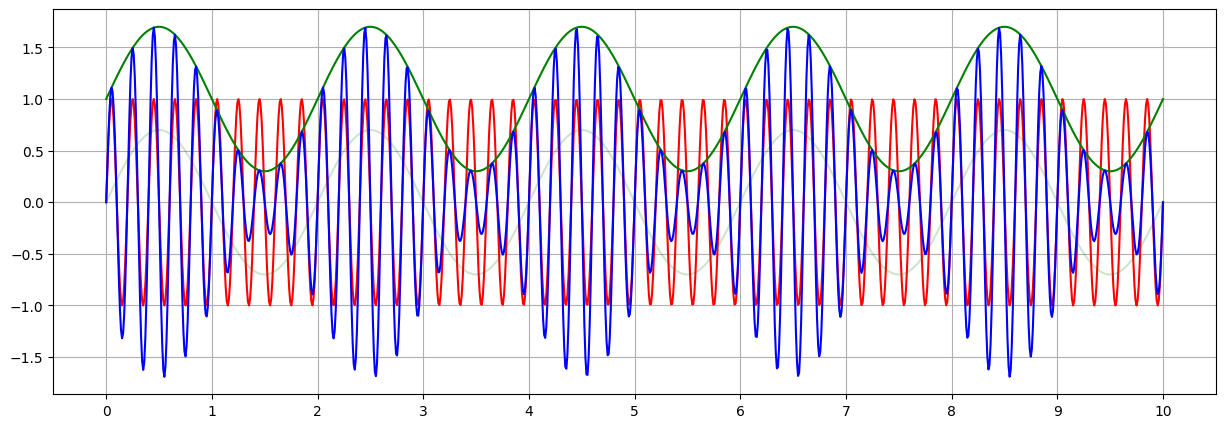

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

A_carrier = 1
F_carrier = np.sin(2 * np.pi * F * t)
carrier = A_carrier * F_carrier

A_signal = 0.7
F_signal = np.sin(2 * np.pi * F/10 * t)
signal = A_signal * F_signal

modulation = (A_carrier + signal) * F_carrier

ax.plot(t, carrier, color='r')
ax.plot(t, signal, color='g', alpha=.2)
ax.plot(t, A_carrier + signal, color='g')
ax.plot(t, modulation, color='b')
ax.set_xticks(np.arange(11))
ax.grid(True)

In [63]:
signal_spectrum = np.abs(rfft(modulation))
freq = rfftfreq(modulation.size, d=1/sampling_rate)

In [82]:
print(f"Carrier frequency {F} Hz")
print(f"Carrier + Signal  {F + F/10} Hz")
print(f"Carrier - Signal  {F - F/10} Hz")

Carrier frequency 5.0 Hz
Carrier + Signal  5.5 Hz
Carrier - Signal  4.5 Hz


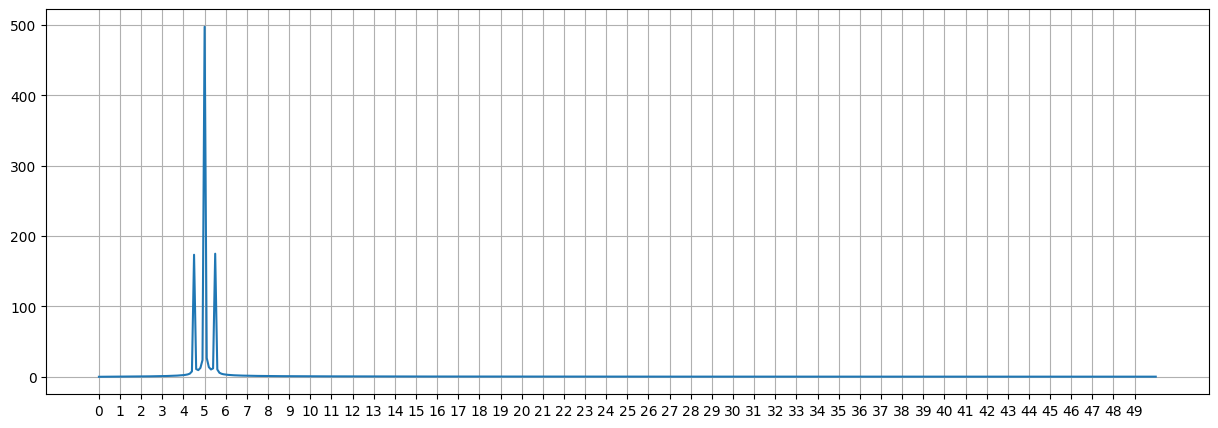

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(freq, signal_spectrum)
ax.set_xticks(np.arange(0, sampling_rate/2, 1))
ax.grid(True)

In [80]:
freq[find_peaks(signal_spectrum)[0]]

array([4.5, 5. , 5.5])

In [81]:
find_peaks(signal_spectrum)

(array([45, 50, 55]), {})